In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble= r'\usepackage{mathtools,times}')
plt.rc('font', size=10, family='serif', serif='cm')

def get_eigs(lmbda, K=5, plot_K_only=False):
    J = K**2
    lambdas = np.zeros((K, J))
    eigs = np.zeros((K, J))
    nus = 1. / np.arange(1, K+1) ** 2
    for k in range(K):
        N = (k+1) ** 2 # fake N(d,k)
        if k == 0:
            lambdas[k,0] = np.exp(-10 * np.arange(N) ** 2 / N*2)
        else:
#             lambdas[k,:N] = np.exp(-3. * np.floor(3 * np.arange(N)**2 / N) / N)
            lambdas[k,:N] = np.exp(-10. * np.arange(N)**2 / N**2)
        if plot_K_only:
            eigs[k,:] = nus[k]
        else:
            eigs[k,:] = lambdas[k,:] - lmbda / nus[k]
        
    return np.clip(eigs, a_min=0, a_max=None)


<Figure size 640x480 with 0 Axes>

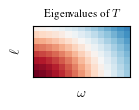

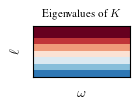

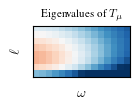

In [3]:
x, y = np.arange(15) + 1, np.arange(0, 8) + 1
X, Y = np.meshgrid(x, y)

def get_T(x, y, sigma_x, sigma_y):
    out = sigma_x * (x ** 2)[np.newaxis, :] + sigma_y * (y ** 2)[:, np.newaxis]
    return np.exp(-out)

sigma_x = .005
sigma_y = .01

T = get_T(x, y, sigma_x, sigma_y)
plt.figure()

K = np.zeros(*x[np.newaxis:].shape) + y[:, np.newaxis] / 7

lambd = .1
T_lambda = np.clip(T - lambd * K ** (-1), a_min=0, a_max=None)


for A, name, save_name in zip([T, K, T_lambda], ['$T$', '$K$', '$T_\mu$'], ['T', 'K', 'Tlmbda']):
    fig, ax = plt.subplots(figsize=(1.25, 1))
    ax.imshow(A[::-1, :], cmap='RdBu_r', vmin=0, vmax=1)
    ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(r'$\omega$')
    ax.set_ylabel(r'$\ell$')
    ax.set_title(r'Eigenvalues of ' + name, fontsize=8)
    fig.savefig('eig' + save_name + '.pdf', pad_inches=0.05, bbox_inches='tight')


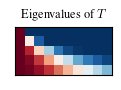

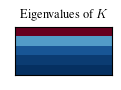

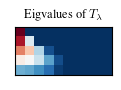

In [4]:

figsize=(1.25, 1)
# T
fig, ax = plt.subplots(figsize=figsize)
eigs = get_eigs(lmbda=0)
ax.imshow(eigs[:, :10], cmap="RdBu_r")
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Eigenvalues of $T$', fontsize=9)
fig.savefig('eigT.pdf', pad_inches=0, bbox_inches='tight')

# K
fig, ax = plt.subplots(figsize=figsize)
eigs = get_eigs(lmbda=0, plot_K_only=True)
ax.imshow(eigs[:, :10], cmap="RdBu_r")
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Eigenvalues of $K$', fontsize=9)
fig.savefig('eigK.pdf', pad_inches=0, bbox_inches='tight')

# # T_lambda
fig, ax = plt.subplots(figsize=figsize)
eigs = get_eigs(lmbda=0.03)
ax.imshow(eigs[:, :10], cmap="RdBu_r")
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Eigvalues of $T_\lambda$', fontsize=9)
fig.savefig('eigTlmbda.pdf', pad_inches=0, bbox_inches='tight')